<a href="https://colab.research.google.com/github/Anik-Paul-toj/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read world Applications


* Contexual Advertisment
* Email Clients - spam filtering, smart reply
* Social Media - removing adult content, opinion mining
* Search Engines
* Chatbots

# Common NLP Tasks

* Text/Document Classification
* Sentiment Analysis
* Information Retrieval
* Parts of Speech Tagging
* Language Detection And Machine Translation
* Conversational Agents
* Knowledge Graph & QA Systems
* Text Summarization
* Topic Modeling
* Text Generation
* Spell Checking & Grammar Creation
* Text Parsing
* Speech To Text


# Approaches to NLP

* Heuristic Methods
* Machine Learning Based Methods
* Deep Learning Based Methods


# Heuristic Approaches

## Example

* rRegular Expression (Regex): A sequence of characters that defines a search pattern, used for string matching, validation, and text processing in programming.

* WordNet: A large lexical database of English that groups words into sets of synonyms (synsets) and records their semantic relationships.

* Open Mind Common Sense (OMCS): A knowledge base project that collects and organizes common-sense facts from the public to help AI systems understand everyday concepts and reasoning.

# Challenges in NLP

* Ambiguity
* Contexual Words
* Colloquialisms and slang
* Synonyms
* Irony, Sarcasm and Tonal Difference
* Spelling Errors
* Creativity
* Diversity
*

#NLP Pipeline
* NLP is a set of steps followed to build an end to end NLP software

## NLP Software consists of the following steps
* Data Acquisition
* Text Preparation =>
** text Cleanup
** Basic Preprocessing
** Advance Preprocessing
* Feature Engineering
* Modeling =>
** Model Building
** Evaluation
* Deployment
** Deployment
** Monitoring
** Model Update

## Points to remember
1. it's not universal
2. Deep Learning Pipeline are slightly different
3. pipeline is non-linear


# Data Acquisition

```
Data Availability
│
├── Available
│   ├── Table
│   └── Database
│       └── Data Engineering
│   └── Less Data
│       └── Data Augmentation
│           ├── Synonym Replacement
│           ├── Bigram Flip
│           ├── Back Translation
│           └── Add Noise
│
├── Others
│   ├── Public Dataset
│   ├── Web Scraping
│   │   └── BeautifulSoup
│   ├── API
│   │   └── RapidAPI
│   │       └── Requests → JSON
│   ├── PDF
│   ├── Image
│   └── Audio
│       └── Speech to Text
│
│
└── Nobody
    
```


#Text Preparation

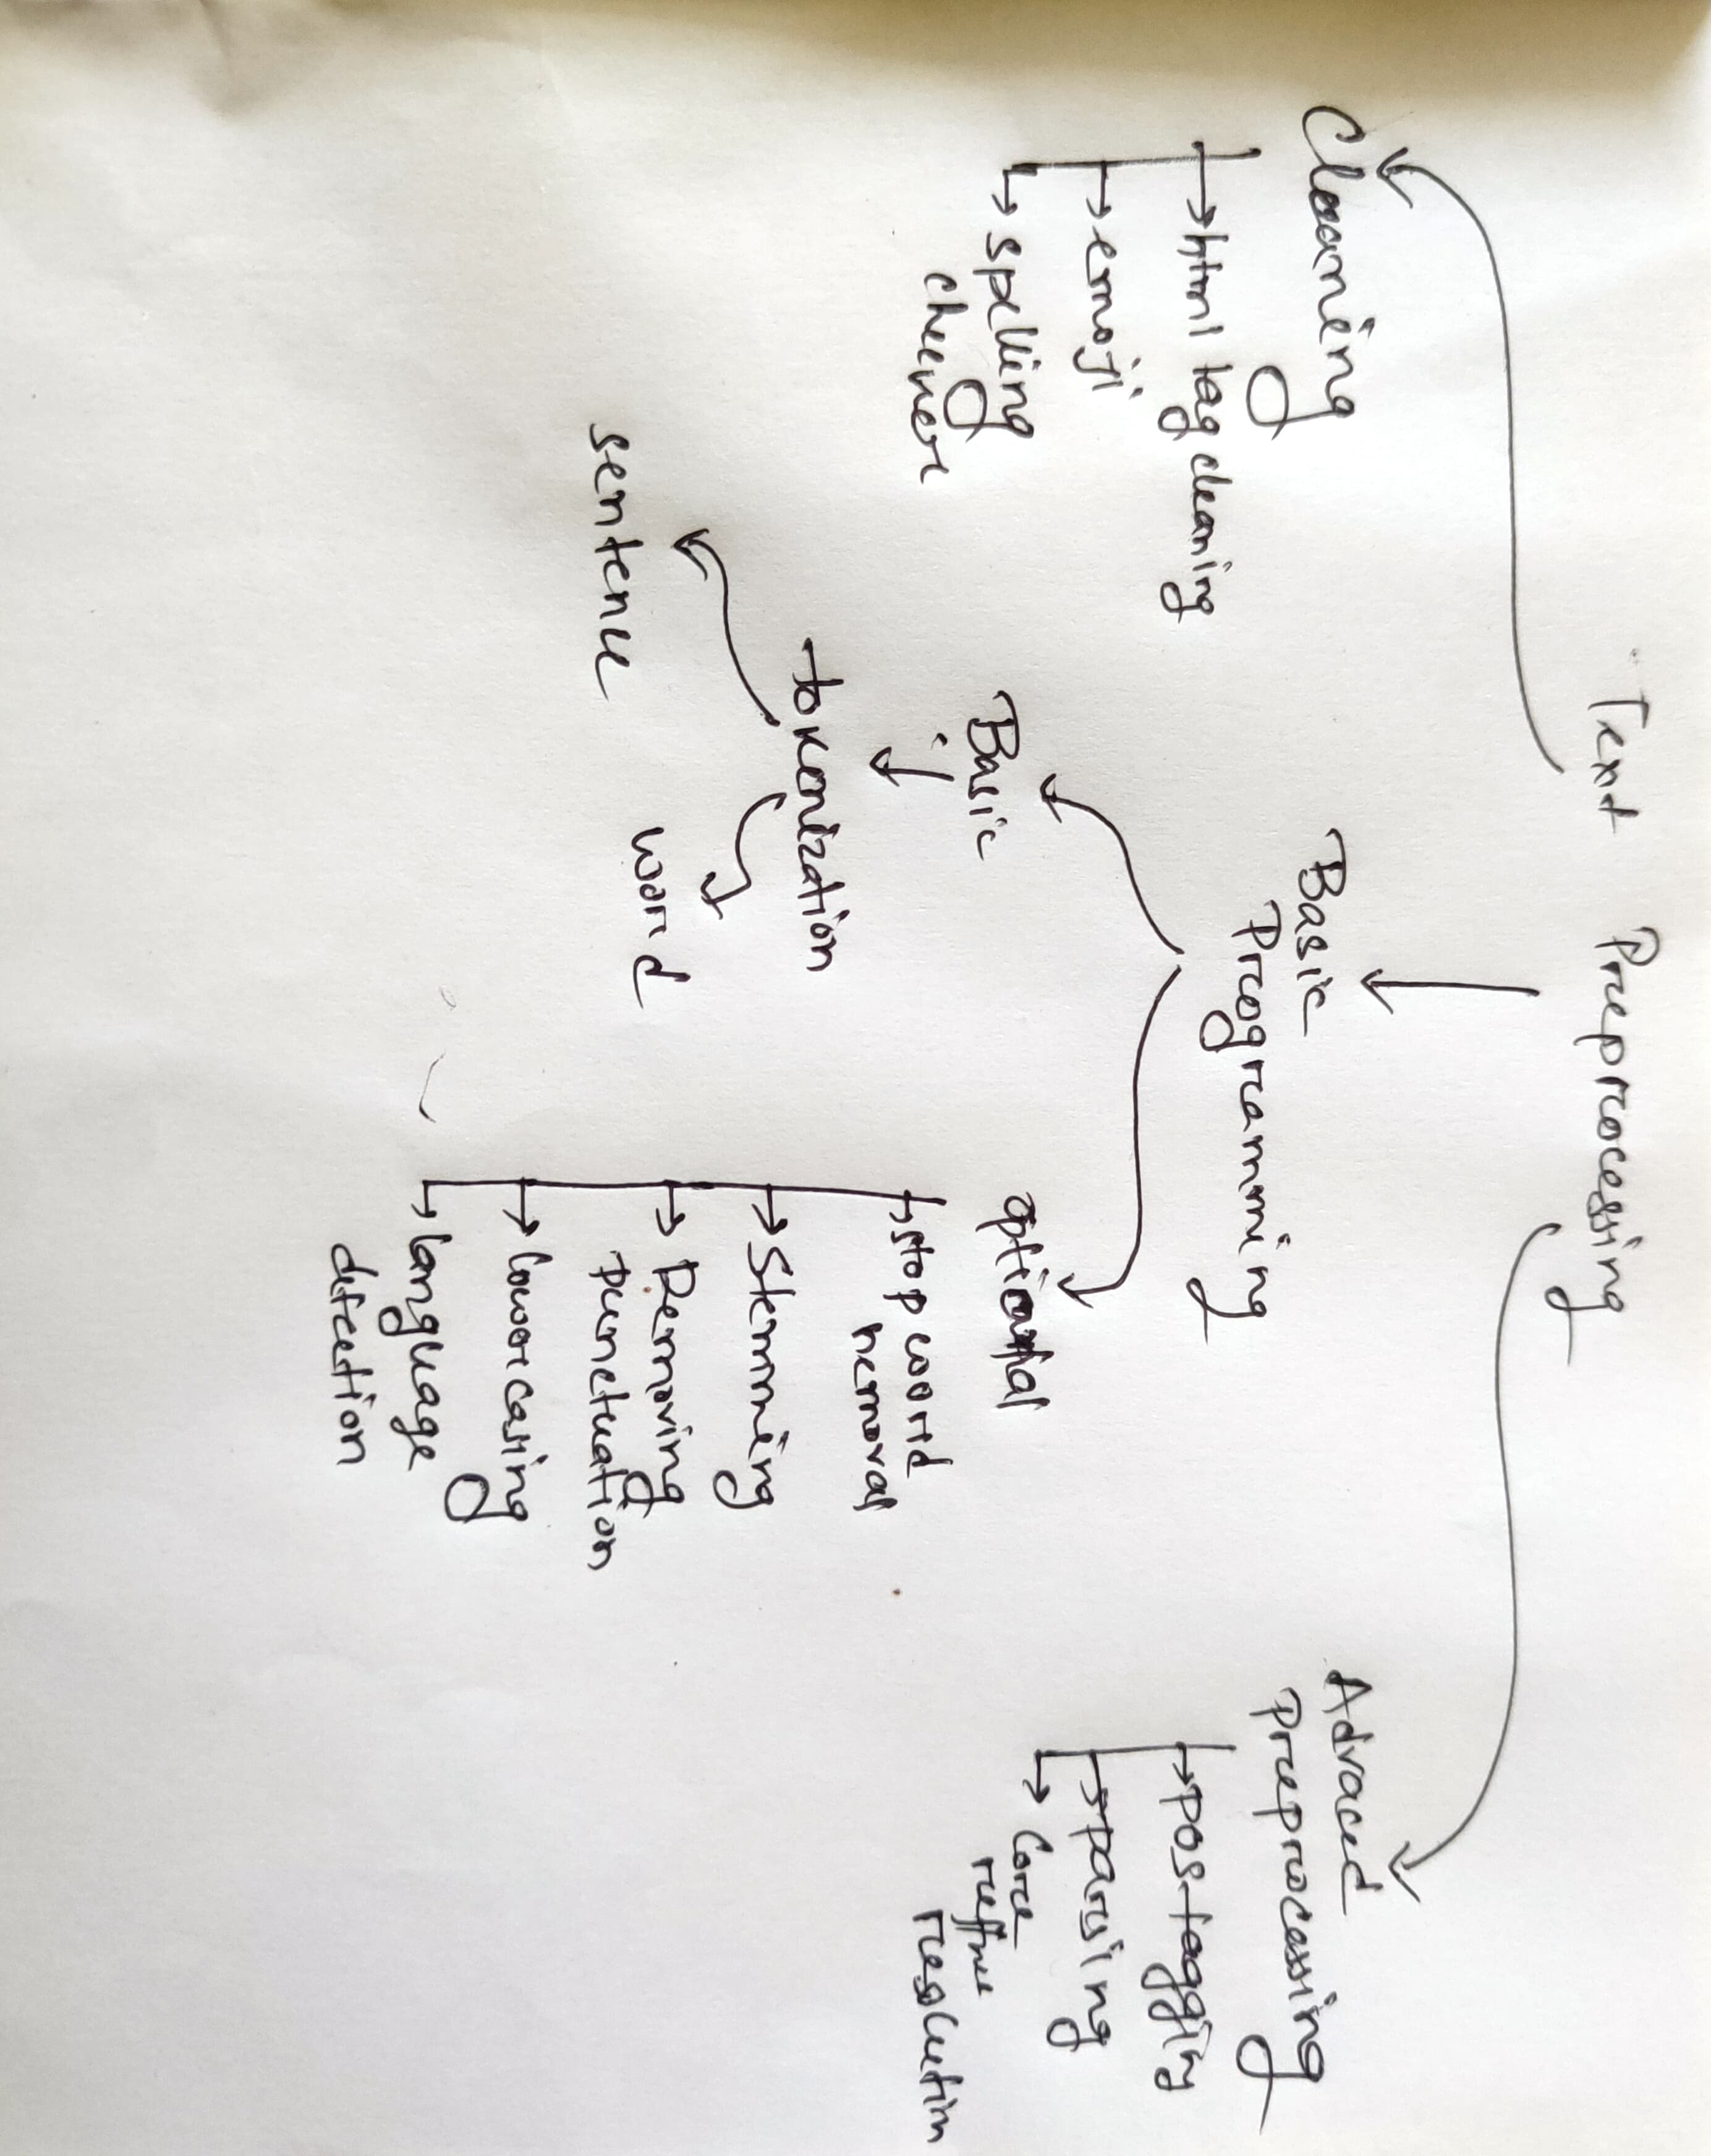

# Feature Engineering

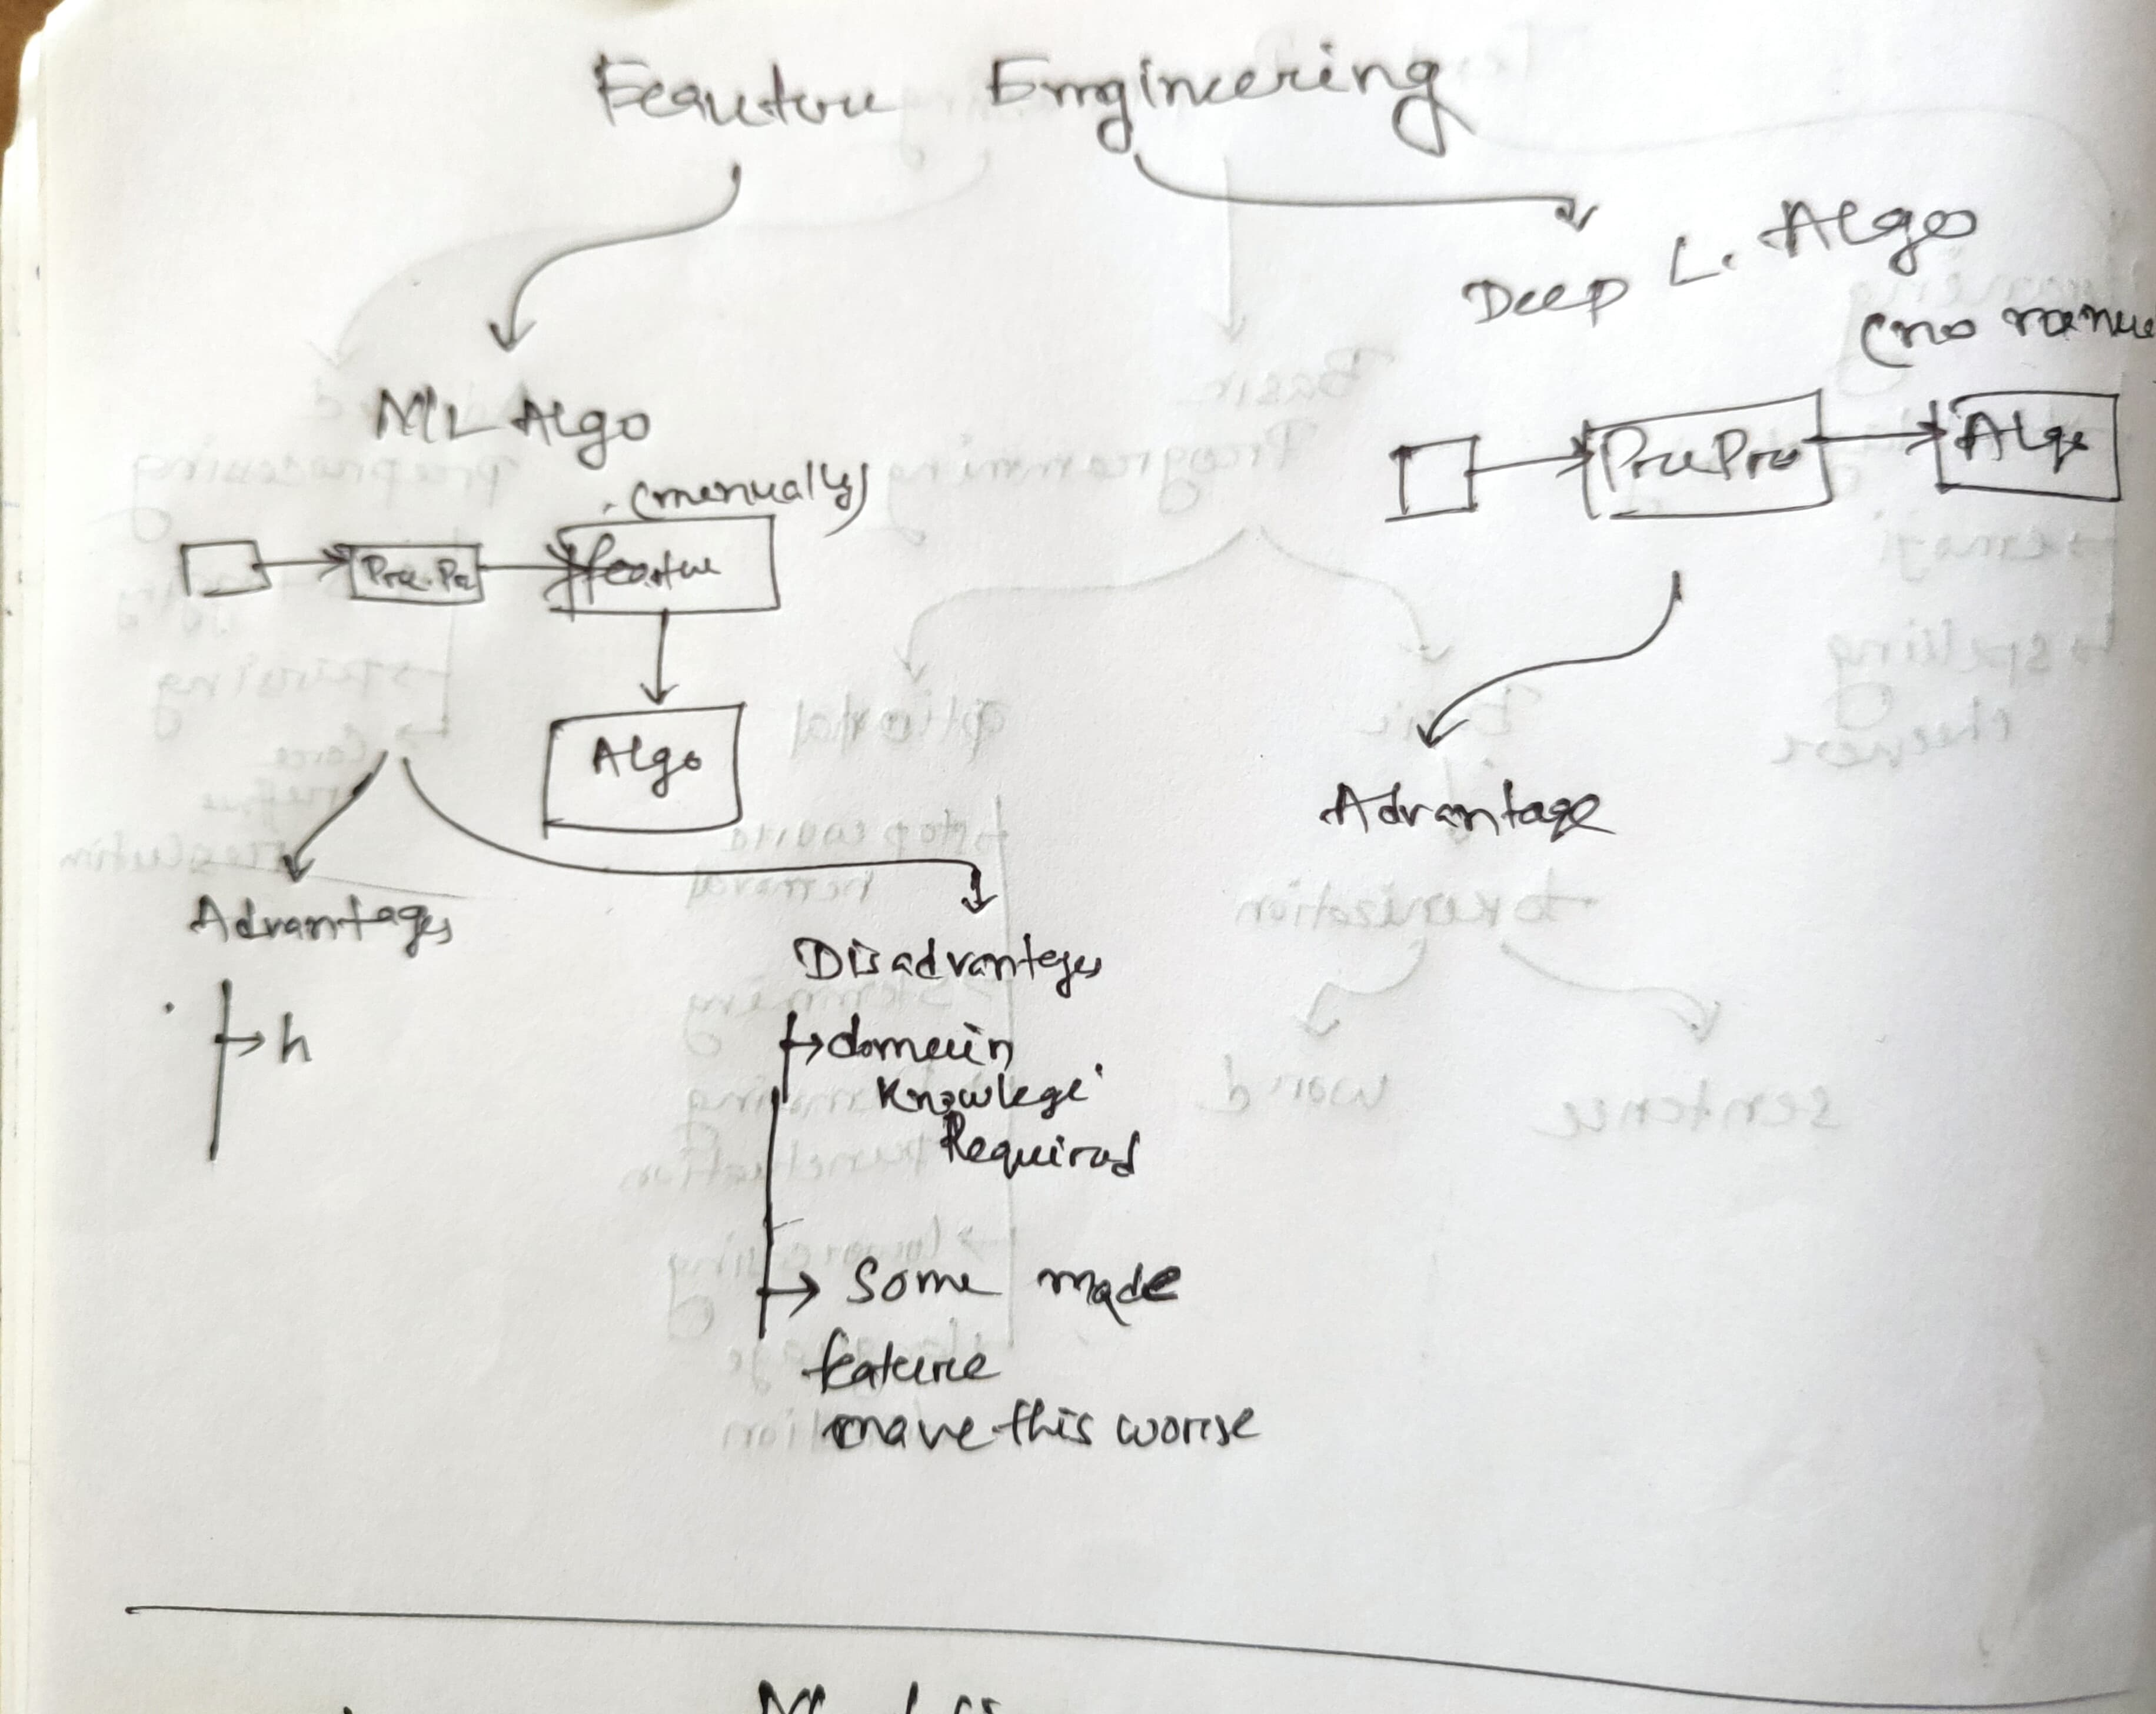

# Modeling

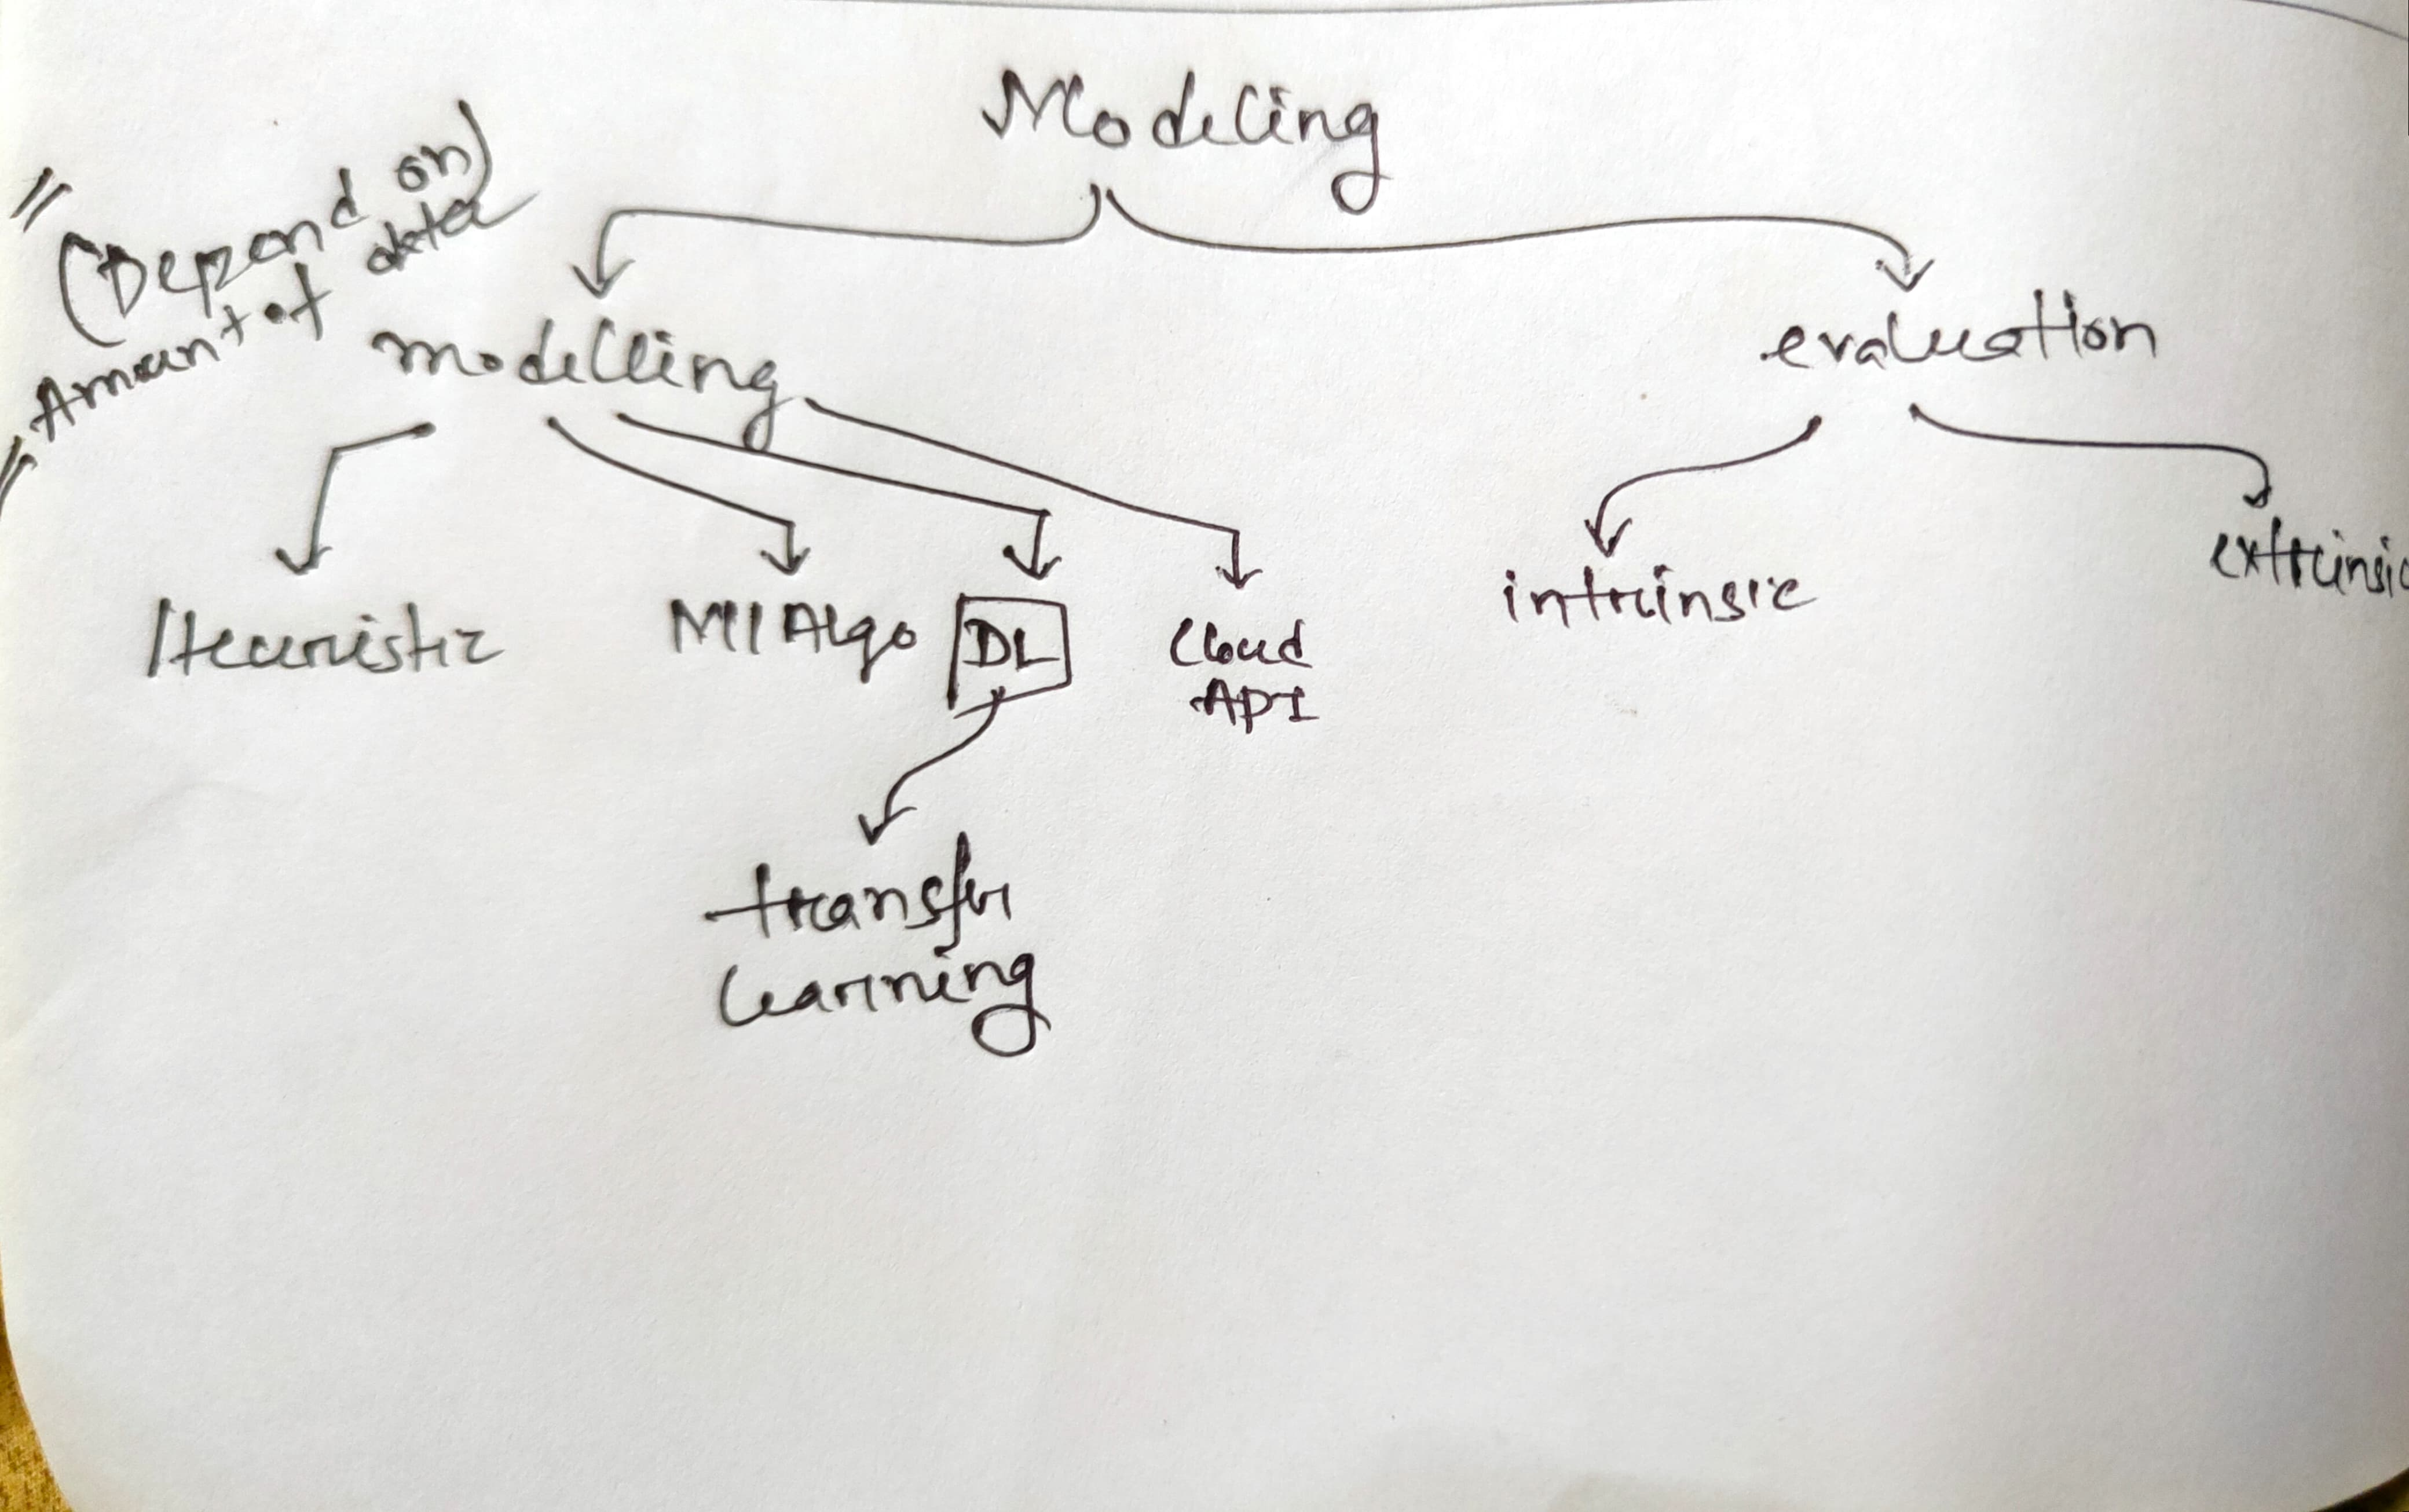

# Deployment

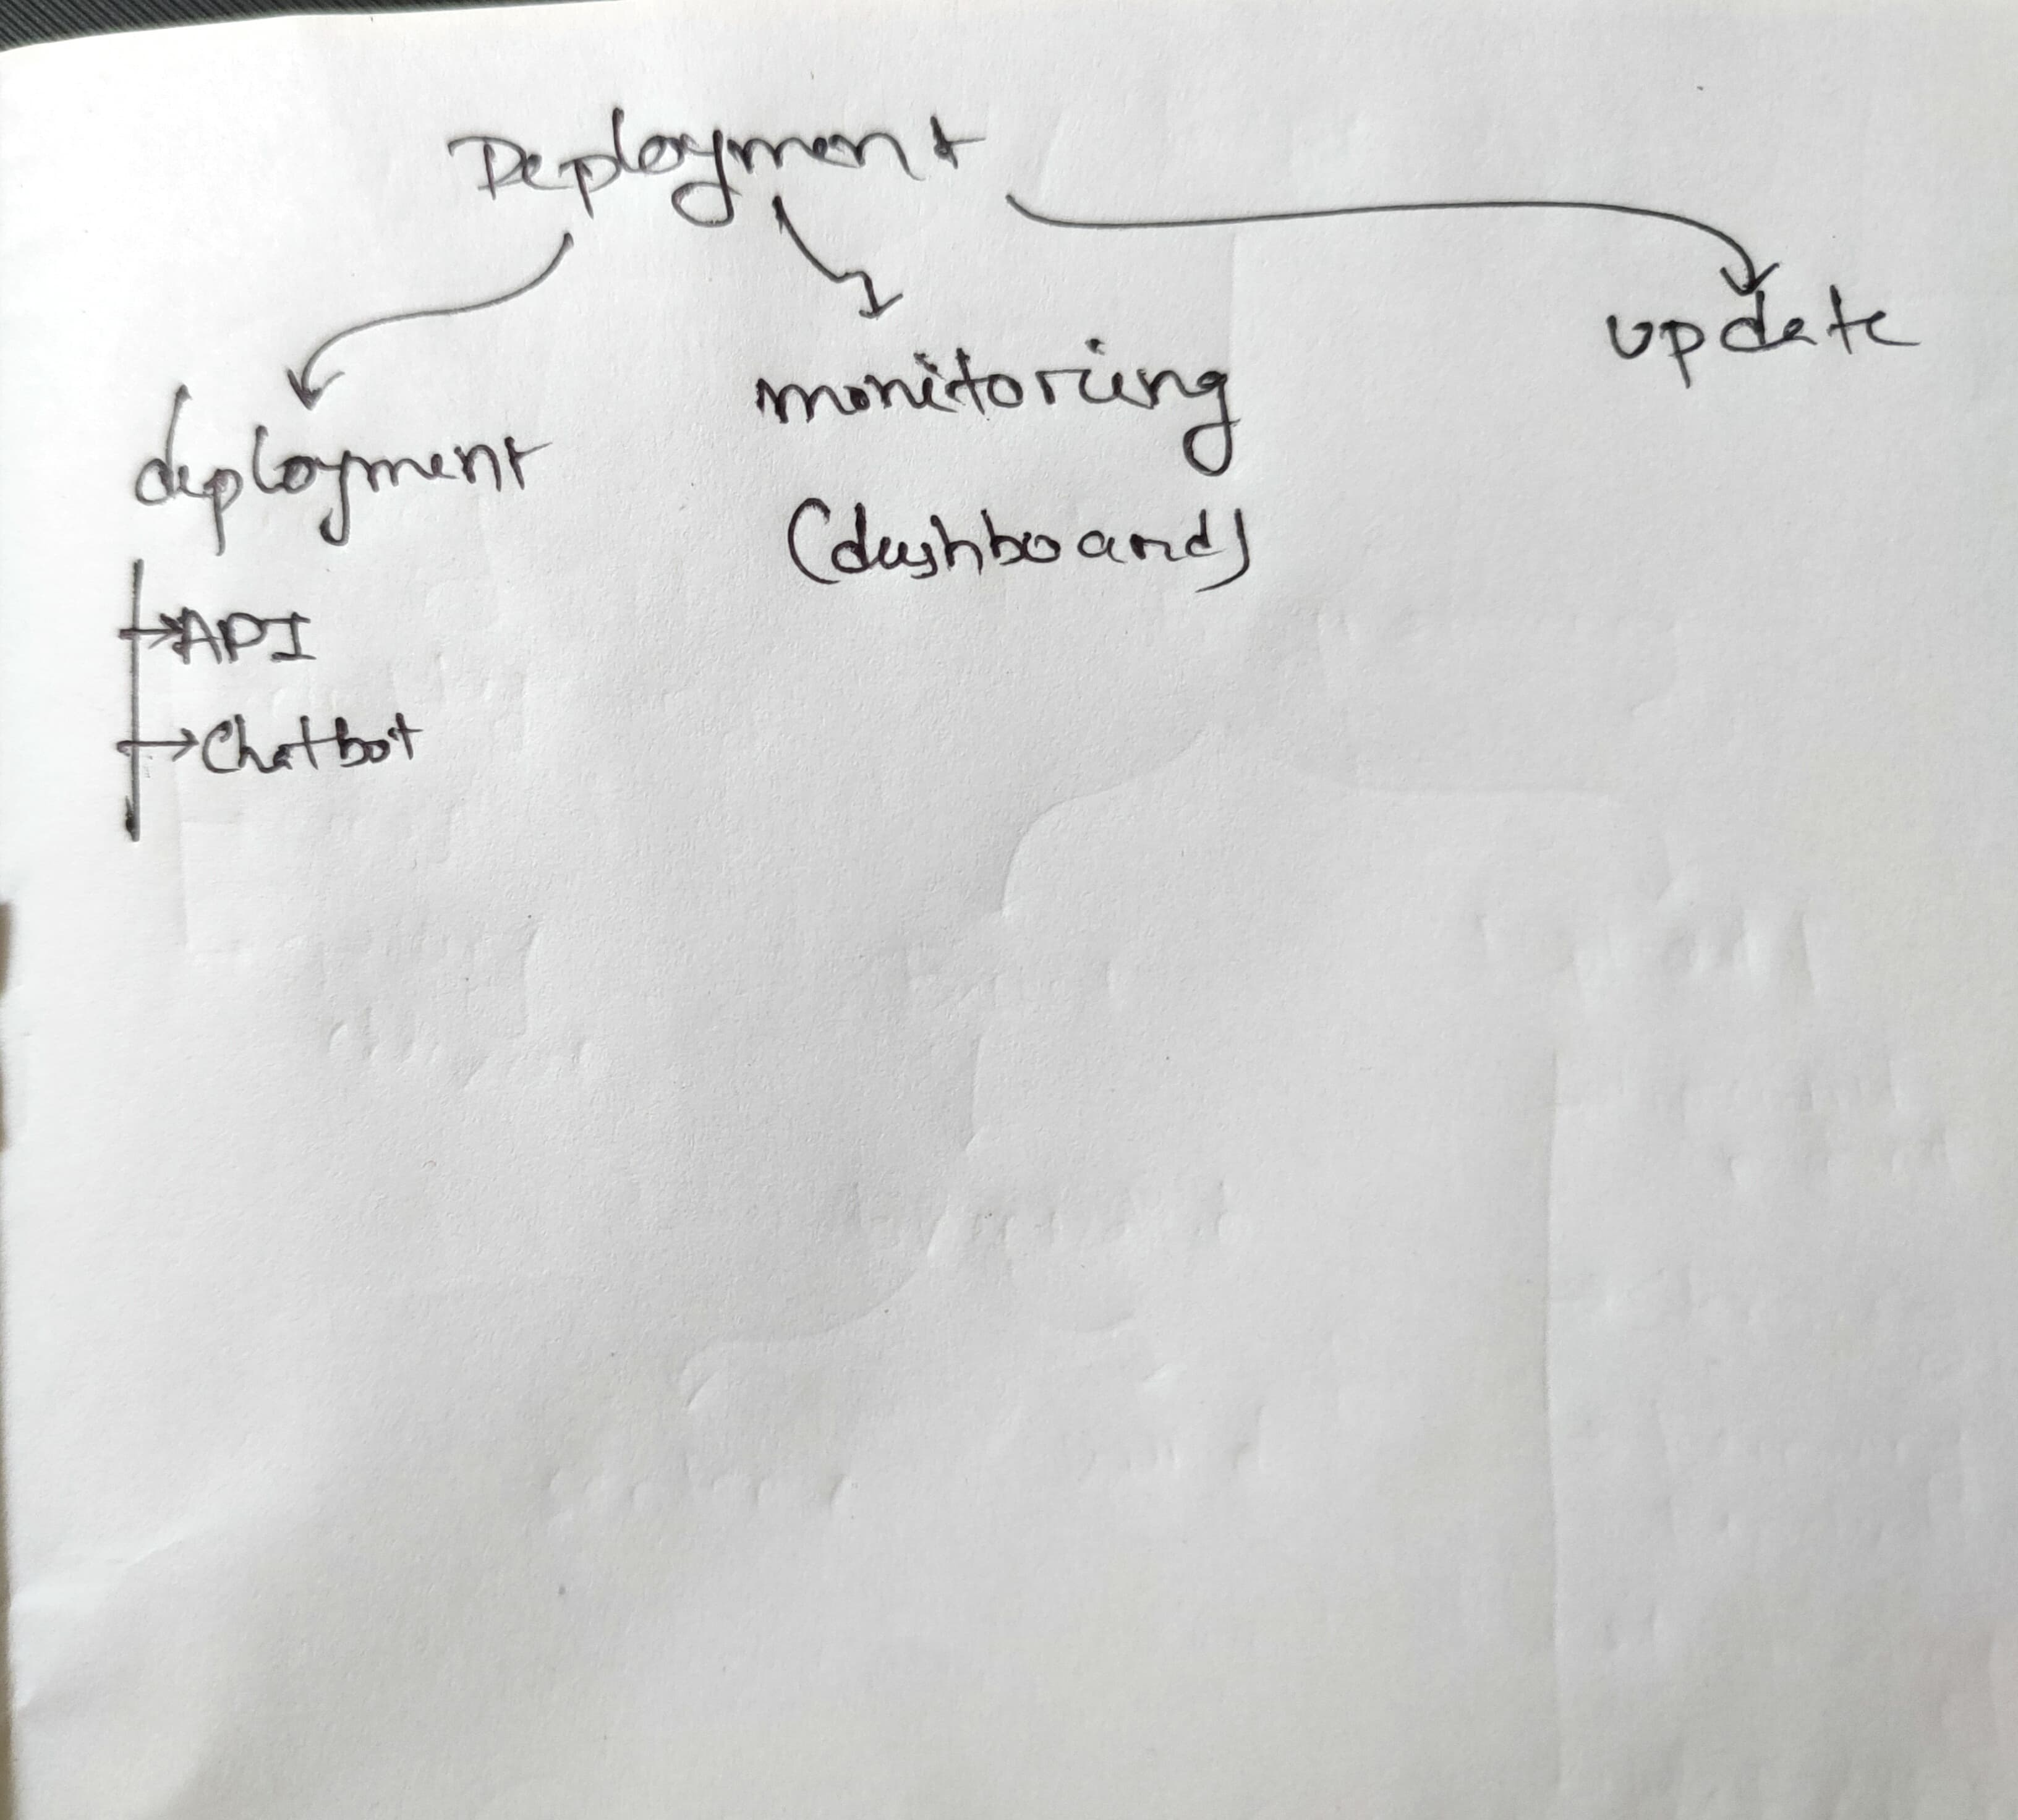

# Text Preparation demo code

## lowercasing

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
import pandas as pd

df = pd.read_csv(f"{path}/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
df['review'] = df['review'].str.lower()

## htmltag removing

In [ ]:
import re
def remove_html(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)

In [ ]:
df['review'] =df['review'].apply(remove_html)

In [ ]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

## remove URL

In [ ]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [ ]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'


In [ ]:
remove_url(text1)

'Check out my notebook '

## remove punctuation

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
  for char in exclude:
    text = text.replace(char,'')
  return text

In [ ]:
df['review'] =df['review'].apply(remove_punc)

In [ ]:
df['review'][3]

'basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs as for the shots with jake just ignore them'

## Chat word treatment

In [ ]:
chat_words = {
    "u": "you",
    "ur": "your",
    "pls": "please",
    "plz": "please",
    "thx": "thanks",
    "ty": "thank you",
    "btw": "by the way",
    "idk": "I don't know",
    "lol": "laughing out loud",
    "brb": "be right back",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "np": "no problem",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "afaik": "as far as I know",
    "asap": "as soon as possible",
    "fyi": "for your information",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "jk": "just kidding",
    "nvm": "never mind",
    "rofl": "rolling on the floor laughing",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "wyd": "what are you doing",
    "wya": "where are you",
    "yw": "you're welcome",
    "dm": "direct message",
    "bc": "because",
    "bday": "birthday",
    "msg": "message",
    "pic": "picture",
    "vid": "video",
    "atm": "at the moment",
    "bff": "best friend forever",
    "irl": "in real life",
    "omw": "on my way",
    "rn": "right now",
    "sav": "save",
    "sec": "second",
    "min": "minute",
    "hrs": "hours",
    "abt": "about",
    "acc": "actually",
    "addy": "address",
    "bcoz": "because",
    "bf": "boyfriend",
    "gf": "girlfriend",
    "fav": "favorite",
    "hbu": "how about you",
    "idc": "I don't care",
    "ilu": "I love you",
    "ily": "I love you",
    "jic": "just in case",
    "k": "okay",
    "kk": "okay",
    "lmk": "let me know",
    "ne1": "anyone",
    "noob": "newbie",
    "omfg": "oh my freaking god",
    "ppl": "people",
    "prolly": "probably",
    "sry": "sorry",
    "sup": "what's up",
    "txt": "text",
    "u2": "you too",
    "xoxo": "hugs and kisses",
    "yolo": "you only live once",
    "gratz": "congratulations"
}


In [ ]:
def chat_conversion(text):
  new_text = []
  for w in text.split():
    lw = w.lower()
    if lw in chat_words:
      new_text.append(chat_words[lw])
    else:
      new_text.append(lw)

  return " ".join(new_text)

In [ ]:
chat_conversion("lots of xoxo")

'lots of hugs and kisses'

##Spelling Correction

In [ ]:
# please read the note book, and also like the notebook  => notebook diffrent in two

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

textBlb = TextBlob(incorrect_text)

textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

## Removing Stop word

In [ ]:
# a the of are my

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords list (only needed once)
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
def remove_stopwords(text):
  new_text = []

  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
remove_stopwords(df['review'][3])

'basically theres  family   little boy jake thinks theres  zombie   closet  parents  fighting   timethis movie  slower   soap opera  suddenly jake decides  become rambo  kill  zombieok first    youre going  make  film  must decide    thriller   drama   drama  movie  watchable parents  divorcing arguing like  real life     jake   closet  totally ruins   film  expected  see  boogeyman similar movie  instead  watched  drama   meaningless thriller spots3   10    well playing parents descent dialogs    shots  jake  ignore '

In [ ]:
df['review'] = df['review'].apply(remove_url)

## handling Emojis

### removing

In [ ]:
import re

def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)


In [ ]:
remove_emoji('Loved the movie. It was 😘😘')

'Loved the movie. It was '

### replacing

In [ ]:
!pip install emoji


In [ ]:
import emoji
print(emoji.emojize(':smile:', language='alias'))
print(emoji.demojize('😊'))
print(emoji.demojize('Python is 👍'))

😄
:smiling_face_with_smiling_eyes:
Python is :thumbs_up:


## Tokenization

### Using the split function

In [ ]:
# word tokenization
df['review'][3].split()

['basically',
 'theres',
 'a',
 'family',
 'where',
 'a',
 'little',
 'boy',
 'jake',
 'thinks',
 'theres',
 'a',
 'zombie',
 'in',
 'his',
 'closet',
 'his',
 'parents',
 'are',
 'fighting',
 'all',
 'the',
 'timethis',
 'movie',
 'is',
 'slower',
 'than',
 'a',
 'soap',
 'opera',
 'and',
 'suddenly',
 'jake',
 'decides',
 'to',
 'become',
 'rambo',
 'and',
 'kill',
 'the',
 'zombieok',
 'first',
 'of',
 'all',
 'when',
 'youre',
 'going',
 'to',
 'make',
 'a',
 'film',
 'you',
 'must',
 'decide',
 'if',
 'its',
 'a',
 'thriller',
 'or',
 'a',
 'drama',
 'as',
 'a',
 'drama',
 'the',
 'movie',
 'is',
 'watchable',
 'parents',
 'are',
 'divorcing',
 'arguing',
 'like',
 'in',
 'real',
 'life',
 'and',
 'then',
 'we',
 'have',
 'jake',
 'with',
 'his',
 'closet',
 'which',
 'totally',
 'ruins',
 'all',
 'the',
 'film',
 'i',
 'expected',
 'to',
 'see',
 'a',
 'boogeyman',
 'similar',
 'movie',
 'and',
 'instead',
 'i',
 'watched',
 'a',
 'drama',
 'with',
 'some',
 'meaningless',
 'thri

In [ ]:
# sentence tokenization
df['review'][3].split('.')

['basically theres a family where a little boy jake thinks theres a zombie in his closet  his parents are fighting all the timethis movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombieok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing  arguing like in real life and then we have jake with his closet which totally ruins all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents  descent dialogs as for the shots with jake just ignore them']

### Regular Expression

In [ ]:
import re

# word tokenization
tokens = re.findall("[\w']+", df['review'][3])
tokens

['basically',
 'theres',
 'a',
 'family',
 'where',
 'a',
 'little',
 'boy',
 'jake',
 'thinks',
 'theres',
 'a',
 'zombie',
 'in',
 'his',
 'closet',
 'his',
 'parents',
 'are',
 'fighting',
 'all',
 'the',
 'timethis',
 'movie',
 'is',
 'slower',
 'than',
 'a',
 'soap',
 'opera',
 'and',
 'suddenly',
 'jake',
 'decides',
 'to',
 'become',
 'rambo',
 'and',
 'kill',
 'the',
 'zombieok',
 'first',
 'of',
 'all',
 'when',
 'youre',
 'going',
 'to',
 'make',
 'a',
 'film',
 'you',
 'must',
 'decide',
 'if',
 'its',
 'a',
 'thriller',
 'or',
 'a',
 'drama',
 'as',
 'a',
 'drama',
 'the',
 'movie',
 'is',
 'watchable',
 'parents',
 'are',
 'divorcing',
 'arguing',
 'like',
 'in',
 'real',
 'life',
 'and',
 'then',
 'we',
 'have',
 'jake',
 'with',
 'his',
 'closet',
 'which',
 'totally',
 'ruins',
 'all',
 'the',
 'film',
 'i',
 'expected',
 'to',
 'see',
 'a',
 'boogeyman',
 'similar',
 'movie',
 'and',
 'instead',
 'i',
 'watched',
 'a',
 'drama',
 'with',
 'some',
 'meaningless',
 'thri

In [ ]:
# sentence tokenization
sentence = "I will be there after 8:00 AM. aeigfuyeg ! djkfbd how are you ?"
sentences1 = re.compile('[.!?] ').split(sentence)
sentences1

['I will be there after 8:00 AM', 'aeigfuyeg ', 'djkfbd how are you ?']

### NLTK

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
word_tokenize(df['review'][3])

['basically',
 'theres',
 'a',
 'family',
 'where',
 'a',
 'little',
 'boy',
 'jake',
 'thinks',
 'theres',
 'a',
 'zombie',
 'in',
 'his',
 'closet',
 'his',
 'parents',
 'are',
 'fighting',
 'all',
 'the',
 'timethis',
 'movie',
 'is',
 'slower',
 'than',
 'a',
 'soap',
 'opera',
 'and',
 'suddenly',
 'jake',
 'decides',
 'to',
 'become',
 'rambo',
 'and',
 'kill',
 'the',
 'zombieok',
 'first',
 'of',
 'all',
 'when',
 'youre',
 'going',
 'to',
 'make',
 'a',
 'film',
 'you',
 'must',
 'decide',
 'if',
 'its',
 'a',
 'thriller',
 'or',
 'a',
 'drama',
 'as',
 'a',
 'drama',
 'the',
 'movie',
 'is',
 'watchable',
 'parents',
 'are',
 'divorcing',
 'arguing',
 'like',
 'in',
 'real',
 'life',
 'and',
 'then',
 'we',
 'have',
 'jake',
 'with',
 'his',
 'closet',
 'which',
 'totally',
 'ruins',
 'all',
 'the',
 'film',
 'i',
 'expected',
 'to',
 'see',
 'a',
 'boogeyman',
 'similar',
 'movie',
 'and',
 'instead',
 'i',
 'watched',
 'a',
 'drama',
 'with',
 'some',
 'meaningless',
 'thri

In [ ]:
sent_tokenize(sentence)

['I will be there after 8:00 AM.', 'aeigfuyeg !', 'djkfbd how are you ?']

### spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(df['review'][3])

In [ ]:
for token in doc:
  print(token)

basically
there
s
a
family
where
a
little
boy
jake
thinks
there
s
a
zombie
in
his
closet
 
his
parents
are
fighting
all
the
timethis
movie
is
slower
than
a
soap
opera
and
suddenly
jake
decides
to
become
rambo
and
kill
the
zombieok
first
of
all
when
you
re
going
to
make
a
film
you
must
decide
if
its
a
thriller
or
a
drama
as
a
drama
the
movie
is
watchable
parents
are
divorcing
 
arguing
like
in
real
life
and
then
we
have
jake
with
his
closet
which
totally
ruins
all
the
film
i
expected
to
see
a
boogeyman
similar
movie
and
instead
i
watched
a
drama
with
some
meaningless
thriller
spots3
out
of
10
just
for
the
well
playing
parents
 
descent
dialogs
as
for
the
shots
with
jake
just
ignore
them


## Stemming

inflection => modification of a word to express differnent grammatical categories such as tense,case, voice, aspect, person, gender and mood.

 Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
sample = 'walk walks walking walked'
stem_words(sample)

'walk walk walk walk'

In [ ]:
sample2 = 'Researchers are studying the effects of different treatments on patients suffering from chronic illnesses, hoping to develop more effective therapies in the coming years.'
stem_words(sample2)

'research are studi the effect of differ treatment on patient suffer from chronic illnesses, hope to develop more effect therapi in the come years.'

## Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly **ensuring that the root word belongs to the language**. In Lemmatization root word is called Lemma. A *lemma* (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, helps with more lemmas


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations = "?.,"
sentence_words = nltk.word_tokenize(sentence)

for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

print("{0:20}{1:20}".format("Word", "Lemma"))
for word in sentence_words:
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


#Assignment

* create a dataset(multiclass classification) of movies col1 => decsc of movie, col2 => movie name, col3 => genre
* perfrom text-preprocessing
*

# **Text Representation/ Text Vectorization**

### What is Feature Extraction from text

Feature extraction from text in NLP means turning ***raw text into numerical or structured data (features)*** that a machine learning model can understand.

Example:

Text: **"I love pizza"**

Features:

Bag of Words → {“I”:1, “love”:1, “pizza”:1}

TF-IDF → weighted word scores

Word Embeddings → vector representations (e.g., [0.2, 0.8, …])

👉 In short: It’s the process of converting text into useful information (numbers) for analysis or modeling.

### Why do you need it?

* Computers can't understand raw text (words/sentences) directly — they only work with numbers.
* Feature extraction converts text into numeric features so machine learning models can:

1. Detect patterns (e.g., spam vs. not spam)

2. Understand meaning/semantics (via embeddings)

3. Make predictions or classifications.

***In short: It bridges the gap between human language and machine learning.***

### Why it is difficult?

1. Language is complex – same word can have different meanings (e.g., "bank" = riverbank vs. financial bank).

2. Synonyms & variations – different words can mean the same thing (happy, joyful).

3. Context matters – "He killed it on stage" means success, not murder.

4. High dimensionality – text has thousands of unique words → huge feature space.

5. Noisy data – typos, slang, abbreviations, emojis, etc.

6. Grammar & structure – word order changes meaning ("dog bites man" vs. "man bites dog").

***👉 In short: Human language is ambiguous, varied, and context-dependent, which makes extracting useful features challenging.***

## One Hot Encoding

### 📘 Example: Creating Vocabulary from a Corpus

**Documents (D1–D4):**
- D1: `people watch youtube`
- D2: `youtube watch youtube`
- D3: `people write comment`
- D4: `youtube write comment`

**Corpus:**
- people watch youtube youtube watch youtube
- people write comment youtube write comment


**Vocabulary:**
- Vocabulary size (**V**) = **5**

**Vector Representation (Vocabulary Table):**

| people | watch | youtube | write | comment |
1.  D1 -
- `people` : | 1 | 0 | 0  | 0 | 0     |
- `watch` : | 0 | 1 | 0  | 0 | 0     |
- `youtube` : | 0 | 0 | 1  | 0 | 0     |
- `write` : | 0 | 0 | 0  | 1 | 0     |
- `commenet` : | 0 | 0 | 0  | 0 | 1     |

###  Disadvantages of One-Hot Encoding

1. **High Dimensionality** – For large vocabularies, the vectors become extremely long and memory-inefficient.  
2. **Sparsity** – Most values are 0, which wastes storage and computation.  
3. **No Semantic Meaning** – It does not capture similarity between words (e.g., *cat* and *dog* are as different as *cat* and *car*).  
4. **Curse of Dimensionality** – Models may struggle with too many features when the vocabulary grows.


### Example 1:

In [1]:
# 1. Import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
# 2. Create some sample categorical text data
data = np.array(["cat", "dog", "fish", "dog", "cat"]).reshape(-1, 1)
print("Original Data:\n", data)


Original Data:
 [['cat']
 ['dog']
 ['fish']
 ['dog']
 ['cat']]


In [5]:
# 3. Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [10]:
# 4. Fit and transform the data
one_hot = encoder.fit_transform(data)


In [11]:
# 5. Show the feature names (vocabulary)
print("\nCategories (Vocabulary):\n", encoder.categories_)


Categories (Vocabulary):
 [array(['cat', 'dog', 'fish'], dtype='<U4')]


In [9]:
# 6. Show the one-hot encoded output
print("\nOne-Hot Encoded Array:\n", one_hot)


One-Hot Encoded Array:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Example 2:

In [12]:
# 2. Example sentences
sentences = [
    "I love pizza",
    "I love burgers",
    "Pizza and burgers are tasty"
]

In [13]:
print("Original Sentences:")
for s in sentences:
    print("-", s)

Original Sentences:
- I love pizza
- I love burgers
- Pizza and burgers are tasty


In [14]:
# 3. Split sentences into words (tokenization)
words = []
for s in sentences:
    for w in s.lower().split():
        words.append([w])   # store each word as a list for encoder

In [15]:
print("\nTokenized Words:\n", words)


Tokenized Words:
 [['i'], ['love'], ['pizza'], ['i'], ['love'], ['burgers'], ['pizza'], ['and'], ['burgers'], ['are'], ['tasty']]


In [18]:
# 5. Fit and transform the words
one_hot2 = encoder.fit_transform(words)

In [19]:
# 6. Show vocabulary
print("\nVocabulary (Categories):", encoder.categories_)


Vocabulary (Categories): [array(['and', 'are', 'burgers', 'i', 'love', 'pizza', 'tasty'],
      dtype=object)]


In [21]:
# 6. Show vocabulary
print("\nVocabulary (Categories):\n", encoder.categories_)


Vocabulary (Categories):
 [array(['and', 'are', 'burgers', 'i', 'love', 'pizza', 'tasty'],
      dtype=object)]


In [22]:
# 7. Show one-hot encoded result
print("\nOne-Hot Encoded Matrix:\n", one_hot)


One-Hot Encoded Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
